## Scarichiamo il dataset

In [1]:
!pip install medmnist

In [2]:
import numpy as np
from medmnist.dataset import PneumoniaMNIST
Dataset = PneumoniaMNIST
dataset = Dataset(split='val', download=True)
label_map = dataset.info['label']

Using downloaded and verified file: /Users/angelolongano/.medmnist/pneumoniamnist.npz


# Informazioni sul dataset

In [3]:
dataset

Dataset PneumoniaMNIST of size 28 (pneumoniamnist)
    Number of datapoints: 524
    Root location: /Users/angelolongano/.medmnist
    Split: val
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0

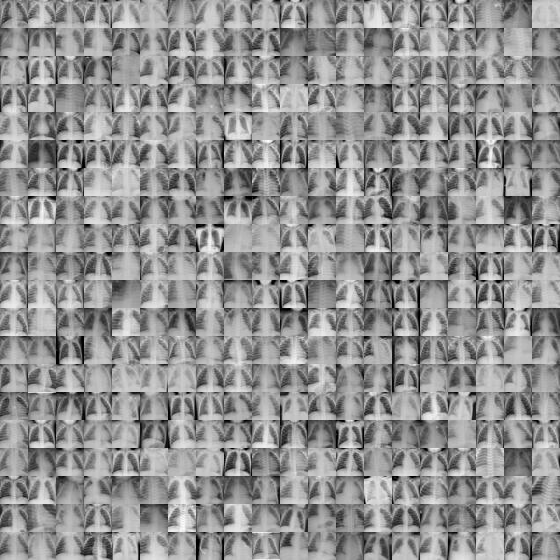

In [4]:
dataset.montage(20)

In [5]:
dataset.info

{'python_class': 'PneumoniaMNIST',
 'description': 'The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/pneumoniamnist.npz?download=1',
 'MD5': '28209eda62fecd6e6a2d98b1501bb15f',
 'url_64': 'https://zenodo.org/records/10519652/files/pneumoniamnist_64.npz?download=1',
 'MD5_64': '8f4eceb4ccffa70c672198ea285246c6',
 'url_128': 'https://zenodo.org/records/10519652/files/pneumoniamnist_128.npz?download=1',
 'MD5_128': '05b46931834c231683c68f40c47b2971',
 'url_224': 'https://zenodo.org/records/10519652/files/pneumoniamnist_224.npz?download=1',
 'MD5_224': 'd6a3c71de1b94

In [6]:
dataset.size

28

# Estraiamo il dataset

In [7]:
X_train, Y_train = Dataset(split='train',download=True).imgs, Dataset(split='train',download=True).labels
X_test, Y_test = Dataset(split='test',download=True).imgs, Dataset(split='test',download=True).labels
X_validation, Y_validation= Dataset(split='val',download=True).imgs, Dataset(split='val',download=True).labels

Using downloaded and verified file: /Users/angelolongano/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /Users/angelolongano/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /Users/angelolongano/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /Users/angelolongano/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /Users/angelolongano/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /Users/angelolongano/.medmnist/pneumoniamnist.npz


In [8]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
X_validation = X_validation.reshape(X_validation.shape[0],-1)

In [9]:
from numpy import ravel
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_validation_scaled = scaler.fit_transform(X_validation)

Y_train = ravel(Y_train)
Y_test = ravel(Y_test)
# X_train_scaled =X_train
# X_test_scaled = X_test
# X_validation_scaled = X_validation

# Classificazione

## Minimi vicini

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':[3,5,7]})
grid.fit(X_train_scaled, Y_train)
grid.score(X_test_scaled, Y_test)
print("Miglior modello: ", grid.best_params_)
print("Miglior score: ", grid.best_score_)


Miglior modello:  {'n_neighbors': 7}
Miglior score:  0.9483850806951993


In [11]:
import pandas as pd
df = pd.DataFrame(grid.cv_results_)
df.sort_values(by='rank_test_score', inplace=True)
df.style \
  .format(precision=8, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1)

,MEAN_FIT_TIME,STD_FIT_TIME,MEAN_SCORE_TIME,STD_SCORE_TIME,PARAM_N_NEIGHBORS,PARAMS,SPLIT0_TEST_SCORE,SPLIT1_TEST_SCORE,SPLIT2_TEST_SCORE,SPLIT3_TEST_SCORE,SPLIT4_TEST_SCORE,MEAN_TEST_SCORE,STD_TEST_SCORE,RANK_TEST_SCORE
2,"0,00524569","0,00028303","0,05630403","0,00140399",7,{'n_neighbors': 7},"0,94479830","0,95753715","0,94585987","0,94048884","0,95324123","0,94838508","0,00614711",1
1,"0,00526452","0,00029688","0,05335541","0,00321998",5,{'n_neighbors': 5},"0,93630573","0,95222930","0,94479830","0,93730074","0,95855473","0,94583776","0,00857197",2
0,"0,00737133","0,00341185","0,09700170","0,02897923",3,{'n_neighbors': 3},"0,93842887","0,94161359","0,94479830","0,94048884","0,95217853","0,94350163","0,00480301",3


## Linear Discriminant Analysis

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# TODO:..sß.

## SVM

Avere gamma alto e c alto rallenta un sacco il modello

In [13]:
from sklearn.svm import SVC
grid = GridSearchCV(SVC(), {'kernel':('linear', 'rbf'), 'C':[1, 10],'gamma':[0.01, 0.1,1]})
grid.fit(X_train_scaled, Y_train)
grid.score(X_test_scaled, Y_test)
print("Miglior modello: ", grid.best_params_)
print("Miglior score: ", grid.best_score_)

Miglior modello:  {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Miglior score:  0.9409520521828204


In [14]:
import pandas as pd
df = pd.DataFrame(grid.cv_results_)
df.sort_values(by='rank_test_score', inplace=True)
df.style \
  .format(precision=8, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1)

,MEAN_FIT_TIME,STD_FIT_TIME,MEAN_SCORE_TIME,STD_SCORE_TIME,PARAM_C,PARAM_GAMMA,PARAM_KERNEL,PARAMS,SPLIT0_TEST_SCORE,SPLIT1_TEST_SCORE,SPLIT2_TEST_SCORE,SPLIT3_TEST_SCORE,SPLIT4_TEST_SCORE,MEAN_TEST_SCORE,STD_TEST_SCORE,RANK_TEST_SCORE
0,"0,80564723","0,06004621","0,08281312","0,00463500",1,"0,01000000",linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}","0,93949045","0,94055202","0,94055202","0,93942614","0,94473964","0,94095205","0,00195605",1
2,"0,76675577","0,05972576","0,08332338","0,00292255",1,"0,10000000",linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}","0,93949045","0,94055202","0,94055202","0,93942614","0,94473964","0,94095205","0,00195605",1
4,"0,77528977","0,06243216","0,08390436","0,00230710",1,"1,00000000",linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}","0,93949045","0,94055202","0,94055202","0,93942614","0,94473964","0,94095205","0,00195605",1
6,"0,78950639","0,05769153","0,08435750","0,00182323",10,"0,01000000",linear,"{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}","0,93949045","0,94055202","0,94055202","0,93942614","0,94473964","0,94095205","0,00195605",1
8,"0,78409138","0,06873673","0,08492665","0,00169540",10,"0,10000000",linear,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}","0,93949045","0,94055202","0,94055202","0,93942614","0,94473964","0,94095205","0,00195605",1
10,"0,78105006","0,06749866","0,08459649","0,00252482",10,"1,00000000",linear,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}","0,93949045","0,94055202","0,94055202","0,93942614","0,94473964","0,94095205","0,00195605",1
7,"3,84401140","0,01680353","1,18856606","0,00378725",10,"0,01000000",rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","0,84394904","0,86730361","0,86624204","0,85441020","0,85759830","0,85790064","0,00854302",7
1,"3,70556216","0,13983711","1,18161783","0,02168620",1,"0,01000000",rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","0,82802548","0,85350318","0,85138004","0,84697131","0,83846971","0,84366995","0,00936834",8
3,"3,82424693","0,02339974","1,46844845","0,00474977",1,"0,10000000",rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","0,74203822","0,74203822","0,74309979","0,74282678","0,74282678","0,74256596","0,00044228",9
5,"3,85211296","0,02140443","1,45578103","0,05588526",1,"1,00000000",rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","0,74203822","0,74203822","0,74309979","0,74282678","0,74282678","0,74256596","0,00044228",9


## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

grid = GridSearchCV(RandomForestClassifier(), {'n_estimators':[100,200,300],'max_depth':[2,3,4]})
grid.fit(X_train_scaled, Y_train)
grid.score(X_test_scaled, Y_test)
print("Miglior modello: ", grid.best_params_)
print("Miglior score: ", grid.best_score_)

Miglior modello:  {'max_depth': 4, 'n_estimators': 300}
Miglior score:  0.9324536169003025


In [16]:
import pandas as pd
df = pd.DataFrame(grid.cv_results_)
df.sort_values(by='rank_test_score', inplace=True)
df.style \
  .format(precision=8, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1)

,MEAN_FIT_TIME,STD_FIT_TIME,MEAN_SCORE_TIME,STD_SCORE_TIME,PARAM_MAX_DEPTH,PARAM_N_ESTIMATORS,PARAMS,SPLIT0_TEST_SCORE,SPLIT1_TEST_SCORE,SPLIT2_TEST_SCORE,SPLIT3_TEST_SCORE,SPLIT4_TEST_SCORE,MEAN_TEST_SCORE,STD_TEST_SCORE,RANK_TEST_SCORE
8,"2,82513719","0,01578872","0,01101050","0,00011143",4,300,"{'max_depth': 4, 'n_estimators': 300}","0,92356688","0,94479830","0,93736730","0,92242295","0,93411265","0,93245362","0,00847203",1
6,"0,93920670","0,00791151","0,00505857","0,00009645",4,100,"{'max_depth': 4, 'n_estimators': 100}","0,91932059","0,93630573","0,93418259","0,92986185","0,93198725","0,93033160","0,00591142",2
7,"1,88030233","0,01519108","0,00803127","0,00010062",4,200,"{'max_depth': 4, 'n_estimators': 200}","0,91825902","0,93842887","0,93418259","0,92454835","0,93304995","0,92969376","0,00727934",3
4,"1,48317227","0,06432606","0,00776205","0,00058995",3,200,"{'max_depth': 3, 'n_estimators': 200}","0,91932059","0,92250531","0,92887473","0,92029756","0,92561105","0,92332185","0,00351847",4
5,"2,14202361","0,03082157","0,00986757","0,00038186",3,300,"{'max_depth': 3, 'n_estimators': 300}","0,91188960","0,92887473","0,92993631","0,91817216","0,92242295","0,92225915","0,00673740",5
3,"0,70178094","0,01291982","0,00495405","0,00059982",3,100,"{'max_depth': 3, 'n_estimators': 100}","0,91401274","0,92462845","0,92569002","0,91710946","0,92348565","0,92098526","0,00458906",6
2,"1,43926916","0,04614133","0,00885072","0,00108108",2,300,"{'max_depth': 2, 'n_estimators': 300}","0,89808917","0,90552017","0,92038217","0,90010627","0,90648247","0,90611605","0,00780461",7
1,"0,97151828","0,04846673","0,00651827","0,00031646",2,200,"{'max_depth': 2, 'n_estimators': 200}","0,89915074","0,90764331","0,91613588","0,90329437","0,89904357","0,90505357","0,00638095",8
0,"0,49111009","0,01905490","0,00453286","0,00041187",2,100,"{'max_depth': 2, 'n_estimators': 100}","0,90021231","0,90127389","0,90976645","0,89904357","0,89798087","0,90165542","0,00420336",9
